# This project analyzes European sales data to understand revenue trends and business performance. I cleaned and prepared the data, converted date fields for time-based analysis, and explored key metrics such as total revenue, revenue by country, top-selling product categories, and yearly sales trends. The analysis provides insights into which countries and products generate the most revenue and how sales change over time.


In [ ]:
#created and sav python file from download

In [142]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Europe Sales Records.csv',
 'europe_sales_analysis.ipynb']

In [144]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [146]:
#i loaded the raw sales data from csv into a panda dataframe to start exploring
df = pd.read_csv("Europe Sales Records.csv")

In [148]:
# we take a first  look at the data shape (how many rows and columns) and info(data type, missing valus or nulls
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1330 non-null   object 
 1   Country         1330 non-null   object 
 2   Item Type       1330 non-null   object 
 3   Sales Channel   1330 non-null   object 
 4   Order Priority  1330 non-null   object 
 5   Order Date      1330 non-null   object 
 6   Order ID        1330 non-null   int64  
 7   Ship Date       1330 non-null   object 
 8   Units Sold      1330 non-null   int64  
 9   Unit Price      1330 non-null   float64
 10  Unit Cost       1330 non-null   float64
 11  Total Revenue   1330 non-null   float64
 12  Total Cost      1330 non-null   float64
 13  Total Profit    1330 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 145.6+ KB


In [150]:
#1. DATA CLEANING: A.check missing value so that the analysiswouldnt get affected by missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [152]:
 #DATA CLEANING:B. clean column names(sometimes column names have spaces so we can standerdize them to make them readable
df.columns = df.columns.str.strip().str.replace(' ','_')

In [154]:
#convert order_date to datetime(common challenge in interview)
#why it matter dates are stored as text(object) so we need them as datetime to analyze trends over time
#i converted the order date to datetime so i could group sales by monthor yearaccuratly
df['Orderd_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=False)


In [156]:
#ensure numeric columns are correct(itconverts columns to numeric("i ensured numeric columns were properly typed to prevent calculation errors.
df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')
df['Total_Revenue'] = pd.to_numeric(df['Total_Revenue'], errors='coerce')
df['Total_Profit'] = pd.to_numeric(df['Total_Profit'], errors='coerce')

In [158]:
#handling any missing or invalid values(i removed rows with missing value to maintaindata integrity
df.dropna(subset=['Order_Date', 'Units_Sold', 'Total_Revenue'])

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Orderd_Date
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,2011-09-12
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88,2013-10-14
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44,2014-08-13
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50,2010-10-31
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Europe,Norway,Personal Care,Offline,M,1/14/2014,634033286,1/15/2014,3394,81.73,56.67,277391.62,192337.98,85053.64,2014-01-14
1326,Europe,Ukraine,Cereal,Offline,L,4/14/2014,559183347,5/21/2014,3633,205.70,117.11,747308.10,425460.63,321847.47,2014-04-14
1327,Europe,Armenia,Meat,Offline,M,11/9/2015,781416594,12/23/2015,7390,421.89,364.69,3117767.10,2695059.10,422708.00,2015-11-09
1328,Europe,Denmark,Clothes,Offline,H,5/9/2012,713357150,6/3/2012,7088,109.28,35.84,774576.64,254033.92,520542.72,2012-05-09


In [162]:
df['Order_Date'] = df['Order_Date'].str.strip()

In [166]:
df['Orderd_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y', errors='coerce')

In [168]:
df['Order_Date'].dtype

dtype('O')

In [172]:
df['Order_Date_dt'] = pd.to_datetime(df['Order_Date'].astype(str), errors='coerce')

In [180]:
df[['Order_Date', 'Order_Date_dt']].head(10)
df['Order_Date_dt'].dtype

dtype('<M8[ns]')

In [186]:
#create new columns for analysis(i created year and month coumns to make it easier to analyze trends overtime
df['Year'] = df['Order_Date_dt'].dt.year
df['Month'] = df['Order_Date_dt'].dt.month
df.head

<bound method NDFrame.head of       Region                 Country        Item_Type Sales_Channel  \
0     Europe          Czech Republic        Beverages       Offline   
1     Europe  Bosnia and Herzegovina          Clothes        Online   
2     Europe                 Austria           Cereal       Offline   
3     Europe                Bulgaria  Office Supplies        Online   
4     Europe                 Estonia           Fruits        Online   
...      ...                     ...              ...           ...   
1325  Europe                  Norway    Personal Care       Offline   
1326  Europe                 Ukraine           Cereal       Offline   
1327  Europe                 Armenia             Meat       Offline   
1328  Europe                 Denmark          Clothes       Offline   
1329  Europe                 Finland          Clothes        Online   

     Order_Priority  Order_Date   Order_ID   Ship_Date  Units_Sold  \
0                 C   9/12/2011  478051030   9/

In [190]:
#EDA to see how many......
df.shape
df.columns
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Orderd_Date,Order_Date_dt,Year,Month
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,2011-09-12,2011-09-12,2011,9
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88,2013-10-14,2013-10-14,2013,10
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44,2014-08-13,2014-08-13,2014,8
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50,2010-10-31,2010-10-31,2010,10
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78,2016-09-28,2016-09-28,2016,9


In [192]:
df['Total_Revenue'].sum()

1703622398.11

In [202]:
revenue_by_country = (df.groupby('Country')['Total_Revenue'].sum().sort_values(ascending=False))
revenue_by_country.head(10)

Country
Kosovo                    53833142.79
Czech Republic            53543932.14
Ukraine                   53252317.54
Bosnia and Herzegovina    50117508.49
Macedonia                 49222085.25
San Marino                47883708.48
Andorra                   47756693.17
Portugal                  47172189.84
Malta                     47145320.81
Russia                    46051659.81
Name: Total_Revenue, dtype: float64

In [210]:
#revenue trend over time
revenue_by_year = (df.groupby('Year')['Total_Revenue'].sum().reset_index())
revenue_by_year

,Year,Total_Revenue
0,2010,2.093822e+08
1,2011,2.319376e+08
2,2012,2.854859e+08
3,2013,1.829624e+08
4,2014,2.377788e+08
5,2015,2.279541e+08
6,2016,1.915210e+08
7,2017,1.366005e+08


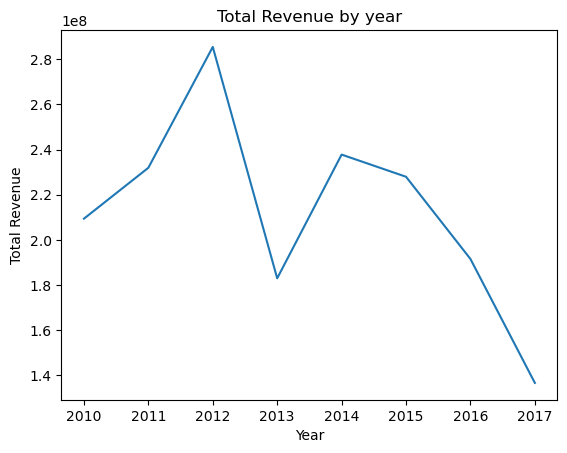

In [212]:
plt.figure()
plt.plot(revenue_by_year['Year'], revenue_by_year['Total_Revenue'])
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by year')
plt.show()

In [218]:
#top item sold
top_items = (df.groupby('Item_Type')['Total_Revenue'].sum().sort_values(ascending=False))
top_items

Item_Type
Office Supplies    4.022140e+08
Household          2.942052e+08
Cosmetics          2.331548e+08
Meat               2.250260e+08
Baby Food          1.436476e+08
Cereal             9.579140e+07
Vegetables         8.974673e+07
Snacks             7.478861e+07
Clothes            6.462655e+07
Personal Care      4.580803e+07
Beverages          2.909316e+07
Fruits             5.520300e+06
Name: Total_Revenue, dtype: float64

In [222]:
#saving cleaned data
df.to_csv("cleaned_europe_sales.csv", index=False)

In [ ]:
#load cleaned data
df = pd.read_csv("data/processed/europe_sales_cleaned.csv")
#postgresql connection
username = "postgres"
password = "your_password"
host ="localhost"
port = "5432"
database = sales_db